# Drug Discovery, FAST-AI Tabular Model test


## DATASETS:
(a) Carbonic Anhydrase II (ChEMBL205), a protein lyase,  
(b) Cyclin-dependent kinase 2 (CHEMBL301), a protein kinase,  
(c) ether-a-go-go-related gene potassium channel 1 (HERG) (CHEMBL240), a voltage-gated ion channel,  
(d) Dopamine D4 receptor (CHEMBL219), a monoamine GPCR,  
(e) Coagulation factor X (CHEMBL244), a serine protease,  
(f) Cannabinoid CB1 receptor (CHEMBL218), a lipid-like GPCR and  
(g) Cytochrome P450 19A1 (CHEMBL1978), a cytochrome P450.  
The activity classes were selected based on data availability and as representatives of therapeutically important target classes or as anti-targets.

In [1]:
!nvidia-smi

Thu Sep 23 15:03:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0  On |                  N/A |
|  0%   44C    P8    15W / 240W |    484MiB /  8116MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
%%capture
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem

RDKit WARNING: [15:03:55] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
top_mcc_scores = {
    
    'CHEMBL205': 0.862,
    'CHEMBL301': 0.926,
    'CHEMBL240': 0.884,
    'CHEMBL219': 0.887,
    'CHEMBL244': 0.983,
    'CHEMBL218': 0.941,
    'CHEMBL1978': 0.904}

In [6]:
path = Path('../dataset/13321_2017_226_MOESM1_ESM/')
df = pd.read_csv('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv', index_col=0)

In [7]:
df.head()

,SMILES,Activity
CID,,
CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc...,1
CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1
CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O...,1
CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1
CHEMBL21427,OB(O)c1ccc(OC)cc1,1


In [8]:
smile = df["SMILES"][0]
smile

'S(=O)(=O)(N)c1cc(N/C(/S)=N\\c2cc(C(=O)[O-])c(cc2)C=2c3c(OC4=CC(=O)C=CC=24)cc(O)cc3)ccc1'

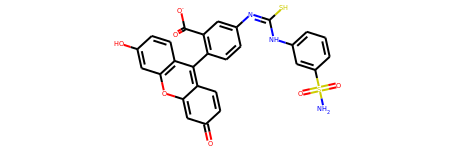

In [9]:
mol = Chem.MolFromSmiles(smile)
mol

In [10]:
#df.head()
list(path.iterdir())

[PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/RdkitDescriptors.py'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL240_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl.csv'),
 PosixPath('../dataset/13321_2017_

# RdkitDescriptors

In [11]:
# function for returning fingerprint from a specific smile.

def fp(smile, diam = 2, bits = 1024):

    mol = Chem.MolFromSmiles(smile)
    Chem.SanitizeMol(mol)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, diam, nBits = bits) 
    return fp

In [12]:
#ECFP4
#Generated Circular fingerprints hashed into n bits length vectors.

def ECFP(ifile, ofile, diam, bits):
    
    open(ofile, "w+")
    
    print(f"Making fingerprints for file: {ifile}")
    df = pd.read_csv(ifile)
    
    df.insert(2, "ECFP4_", df.SMILES.apply(fp))
    
    for i in range(len(df.ECFP4_[0])):
        df.insert(i + 3, f"ECFP4_{i + 1}", 0)

    
    df[[f"ECFP4_{i+1}" for i in range(len(df.ECFP4_[0]))]] = df.ECFP4_.to_list()
    
    df.drop("ECFP4_", axis = 1, inplace = True)
    
    
    df.to_csv(path/ofile, index = None)
    return df

# Run the functions on a file from dataset and store the results

In [13]:
dataset='CHEMBL205_cl'

In [14]:
#ECFP(path/f'{dataset}.csv', f'./{dataset}_ecfp_1024.csv', 2, 1024)

In [15]:
df = pd.read_csv(path/f'{dataset}_ecfp_512.csv')

In [16]:
df.head()

,CID,SMILES,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,...,ECFP4_1016,ECFP4_1017,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024,Activity
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Split data

In [17]:
# Split into X,y
X, y = df.drop(["CID", "SMILES", "Activity"], axis=1), df["Activity"]

In [18]:
# check info of dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17941 entries, 0 to 17940
Columns: 1024 entries, ECFP4_1 to ECFP4_1024
dtypes: int64(1024)
memory usage: 140.2 MB


In [19]:
# y is a pandas series
y.head(), y.size, type(y)

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: Activity, dtype: int64,
 17941,
 pandas.core.series.Series)

# TabularPandas

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,roc_auc_score,recall_score,precision_score,f1_score
from  sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

In [21]:
from fastai.tabular.all import *

/home/kjetil/anaconda3/envs/dat255-drug/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370120218/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [22]:
dep_var = ['Activity']
cat_vars = X.columns
cat_names = list(cat_vars)

In [23]:
x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=666, stratify=df['Activity'])

In [24]:
splits = (list(x_train), list(x_valid))

In [25]:
procs = [Categorify]

In [26]:
to = TabularPandas(df, procs, cat_names=cat_names, y_names=dep_var, splits=splits, y_block = CategoryBlock())

In [27]:
dls = to.dataloaders()

In [28]:
dls.show_batch()

# Train tabular DNN model

In [29]:
def train_model(dls, dataset, epochs=7, wd=0.001, layers=[200,100]):
    
    print(f'Training model on dataset: {dataset}')
    print(f'Trained epochs: epochs={epochs}')
    
    learn = tabular_learner(dls, 
                            layers=[200,100],
                            wd=wd,
                            metrics=[accuracy, 
                            F1Score(), 
                            Precision(), 
                            Recall(), 
                            RocAucBinary(), 
                            MatthewsCorrCoef()])
    
    
    #print(f'Finding learning rate...')
    #lr_min, lr_steep = learn.lr_find(suggestions=True, show_plot=False)
    #print(f'Training model with learning rate: {lr_min}')
    learn.fit_one_cycle(epochs)
    
    
    return learn

In [30]:
train_model(dls, dataset, epochs=10)

Training model on dataset: CHEMBL205_cl
Trained epochs: epochs=10


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.234599,0.121446,0.967122,0.828488,0.787293,0.874233,0.982073,0.811721,00:59
1,0.086611,0.238914,0.880189,0.598131,0.430108,0.981595,0.981332,0.603744,00:56


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
param_grid = {
    'layers': [[200,100], [300,150], [400, 200], [500,250], [600,300], [700, 350], [1000, 500]]
}
param_grid= ParameterGrid(param_grid)

In [ ]:
def train_with_parameters ():
    datasets = ['CHEMBL205_cl', 'CHEMBL301_cl', 'CHEMBL218_cl', 
                'CHEMBL240_cl', 'CHEMBL219_cl', 
                'CHEMBL244_cl', 'CHEMBL1978_cl']
    i = 0
    
    
    df = pd.read_csv(path/f'{datasets[i]}_ecfp_512.csv')
        
    x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=42, stratify=df['Activity'])
    splits = (list(x_train), list(x_valid))
    procs = [Categorify]
        
    dep_var = ['Activity']
    X = df.drop(["CID", "SMILES", "Activity"], axis=1)
    cat_vars = X.columns
    cat_names = list(cat_vars)
    
    to = TabularPandas(df, 
                        procs,
                        cat_names=cat_names, 
                        y_names=dep_var, 
                        splits=splits, 
                        y_block = CategoryBlock())
    dls = to.dataloaders()
    
    for setting in param_grid:
        
        print(f"Training with layers: {setting['layers']}")
        learn = train_model(dls, datasets[i], layers=setting['layers'])
        

In [ ]:
train_with_parameters()

In [31]:
def train_on_datasets ():
    datasets = ['CHEMBL205_cl', 'CHEMBL301_cl', 'CHEMBL218_cl', 
                'CHEMBL240_cl', 'CHEMBL219_cl', 
                'CHEMBL244_cl', 'CHEMBL1978_cl']
    
    for i in range(0,len(datasets)):
        df = pd.read_csv(path/f'{datasets[i]}_ecfp_512.csv')
        
        x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=42, stratify=df['Activity'])
        splits = (list(x_train), list(x_valid))
        procs = [Categorify]
        
        dep_var = ['Activity']
        X = df.drop(["CID", "SMILES", "Activity"], axis=1)
        cat_vars = X.columns
        cat_names = list(cat_vars)
        
        to = TabularPandas(df, 
                           procs,
                           cat_names=cat_names, 
                           y_names=dep_var, 
                           splits=splits, 
                           y_block = CategoryBlock())
        dls = to.dataloaders()
        learn = train_model(dls, datasets[i])
        interp = ClassificationInterpretation.from_learner(learn)
        interp.plot_confusion_matrix()
        

In [32]:
train_on_datasets()

Training model on dataset: CHEMBL205_cl
Trained epochs: epochs=7


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.142879,0.124014,0.960435,0.808108,0.722222,0.917178,0.983328,0.793380,00:29


KeyboardInterrupt: 

# Tabular model with activations

In [ ]:
dataset='chembl205'

In [ ]:
df = pd.read_csv(path/f'{dataset}-data-with-ecfp-activations.csv')
        
x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=42, stratify=df['Activity'])
splits = (list(x_train), list(x_valid))
procs = [Categorify]
        
dep_var = ['Activity']
X = df.drop(["CID", "SMILES", "Activity"], axis=1)
cat_vars = X.columns
cat_names = list(cat_vars)

In [ ]:
to = TabularPandas(df, 
                   procs,
                   cat_names=cat_names, 
                   y_names=dep_var, 
                   splits=splits, 
                   y_block = CategoryBlock())

In [ ]:
dls = to.dataloaders()

In [ ]:
def train_model(dls, dataset, epochs=5, wd=0.02):
    
    print(f'Training model on dataset: {dataset}')
    print(f'Trained epochs: epochs={epochs}')
    
    learn = tabular_learner(dls, 
                            layers=[500,250],
                            wd=wd,
                            metrics=[accuracy, 
                            F1Score(), 
                            Precision(), 
                            Recall(), 
                            RocAucBinary(), 
                            MatthewsCorrCoef()])
    
    
    print(f'Finding learning rate...')
    lr_min, lr_steep = learn.lr_find(suggestions=True, show_plot=False)
    print(f'Training model with learning rate: {lr_steep}')
    learn.fit_one_cycle(epochs, lr_steep)
    
    return learn

In [ ]:
train_model(dls, dataset, epochs=6)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()